In [37]:
!python --version

Python 3.9.12


In [38]:
import pandas as pd
import numpy as np
np.random.seed(42)

In [39]:
df = pd.read_csv('Customer_Churn_Prediction.csv')

In [40]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [42]:
df["phone number"].nunique()

3333

In [43]:
area_code_dummies = pd.get_dummies(df["area code"])
area_code_dummies = area_code_dummies.add_prefix('area_code_')
area_code_dummies

,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [44]:
df["voice mail plan"] = df["voice mail plan"].replace({"no":0,"yes":1})
df["voice mail plan"] = df["voice mail plan"].astype(int)

In [45]:
df["international plan"] = df["international plan"].replace({"no":0,"yes":1})
df["international plan"] = df["international plan"].astype(int)

In [46]:
# form final dataset
df_final = df.drop(columns = ["phone number", "state", "area code"])
df_final = pd.concat([df_final,area_code_dummies], axis = 1)
df_final

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,83,12.56,9.9,6,2.67,2,False,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,123,8.61,9.6,4,2.59,3,False,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,91,8.64,14.1,6,3.81,2,False,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,137,6.26,5.0,10,1.35,2,False,0,0,1


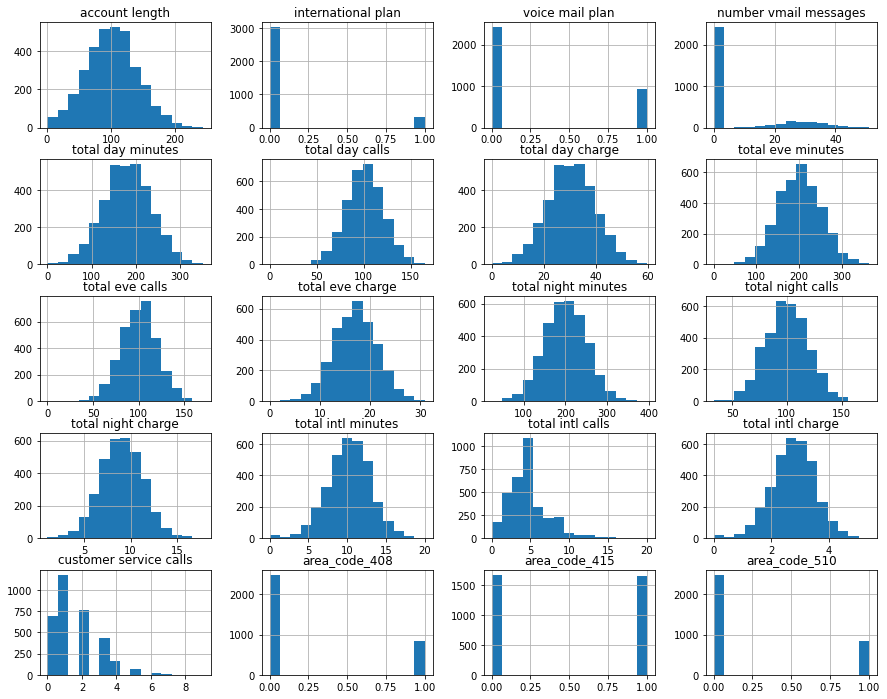

In [47]:
import matplotlib.pyplot as plt

df_final.hist(figsize=(15,12),bins =15)
plt.show()

In [48]:
df_final.groupby(['churn'])['churn'].count()

churn
False    2850
True      483
Name: churn, dtype: int64

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

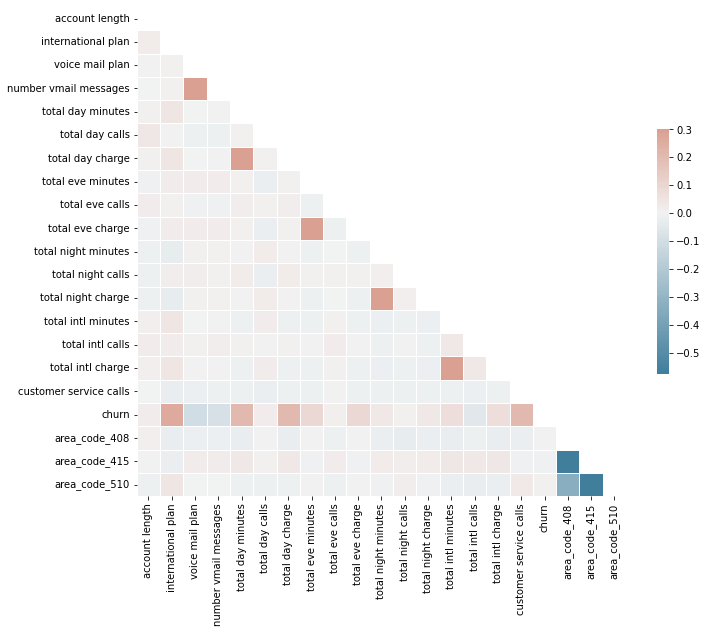

In [50]:
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230,20, as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
"""check feature importances via random forest classifier"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


le = preprocessing.LabelEncoder()
y = le.fit_transform(df_final["churn"])
X = df_final.drop(columns = ["churn"])

In [52]:
X = StandardScaler().fit_transform(X)
X

array([[ 0.67648946, -0.32758048,  1.6170861 , ..., -0.57954443,
         1.00692466, -0.5804683 ],
       [ 0.14906505, -0.32758048,  1.6170861 , ..., -0.57954443,
         1.00692466, -0.5804683 ],
       [ 0.9025285 , -0.32758048, -0.61839626, ..., -0.57954443,
         1.00692466, -0.5804683 ],
       ...,
       [-1.83505538, -0.32758048, -0.61839626, ..., -0.57954443,
        -0.99312296,  1.72274698],
       [ 2.08295458,  3.05268496, -0.61839626, ..., -0.57954443,
        -0.99312296,  1.72274698],
       [-0.67974475, -0.32758048,  1.6170861 , ..., -0.57954443,
         1.00692466, -0.5804683 ]])

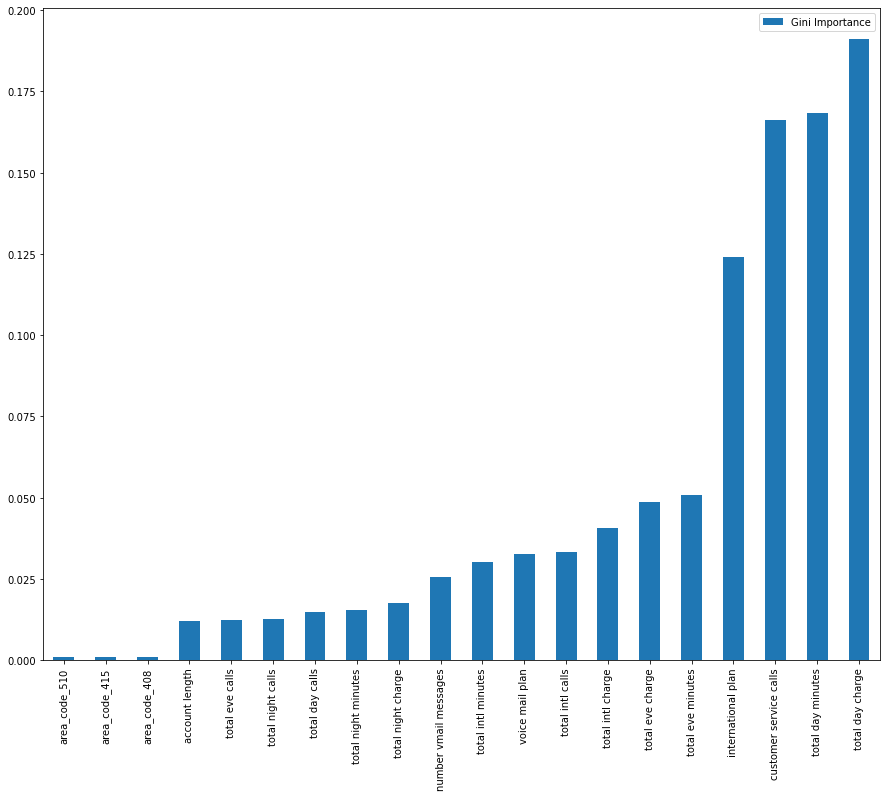

In [53]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestClassifier(max_depth = 5)
forest.fit(X_train,y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature,importance in zip(df_final.drop(columns=["churn"]).columns,forest.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns={0:'Gini Importance'})
importances.sort_values(by ='Gini Importance' ).plot(kind = "bar", rot = 90, figsize = (15,12))
plt.show()

In [54]:
###2. Train/Test Split

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df_final["churn"])

In [55]:
X = df_final.drop(columns=["churn"]) 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [59]:
# Apply classifiers and decide to pick one to use in production based on the performance
# Hyperparameters of the given classifiers are chosen as trial-error 

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]


classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]

In [60]:
###4. Metrics
from sklearn.metrics import f1_score

In [61]:
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.89 f1_score: 0.72 Model: Nearest Neighbors
accuracy: 0.85 f1_score: 0.46 Model: Linear SVM
accuracy: 0.85 f1_score: 0.46 Model: RBF SVM
accuracy: 0.93 f1_score: 0.85 Model: Gaussian Process
accuracy: 0.94 f1_score: 0.86 Model: Decision Tree
accuracy: 0.90 f1_score: 0.73 Model: Random Forest
accuracy: 0.93 f1_score: 0.85 Model: Neural Net
accuracy: 0.88 f1_score: 0.70 Model: AdaBoost
accuracy: 0.85 f1_score: 0.70 Model: Naive Bayes
accuracy: 0.84 f1_score: 0.69 Model: QDA
accuracy: 0.96 f1_score: 0.92 Model: XGBoost
[LightGBM] [Info] Number of positive: 382, number of negative: 2284
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2401
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143286 -> initscore=-1.788263
[LightGBM] [Info] Start trainin

C:\Users\khalilli.k\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy: 0.95 f1_score: 0.89 Model: LightGBM


In [63]:
pip install pydotplus


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=e20ec0411a92563136aab789523678468e0a6f202a0881f0488666c96bec1e88
  Stored in directory: c:\users\khalilli.k\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [64]:
"""visualize the Decision Tree and see how tree-based algorithms decide for this particular problem"""

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG,display, Image
import pydotplus


#Function attributes
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]

def plot_decision_tree(maximum_depth, criterio_type, split_type) : 
    
    #model
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score))
    
    graph = tree.export_graphviz(clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = df_final.drop(columns=["churn"]).columns.to_list(), 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True,
                                       
                  )
    
    pydot_graph = pydotplus.graph_from_dot_data(graph)
    pydot_graph.set_size('"10,10"')
    plt = Image(pydot_graph.create_png())
    display(plt)

plot_decision_tree(3,"gini","best")

accuracy: 0.95 f1_score: 0.89


InvocationException: GraphViz's executables not found